# Task for Today  

***

## Mental Health Treatment Prediction - Heal Yourself

Given *data about the mental health of 158 people*, let's try to predict whether a given subject is **dealing with some mental illness**.  
  
We will use a TensorFlow ANN to make our predictions.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

ModuleNotFoundError: No module named 'numpy'

In [2]:
data = pd.read_csv('../input/mental-health-dataset/Mental Health Questionnaire 2.0.csv')

In [3]:
data

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,15-12-2021 13:18,shwetank1921@gmail.com,Kumar shwetank,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,43,Yes
154,15-12-2021 15:17,shukla.anu23@gmail.com,Anurag Shukla,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,34,No
155,15-12-2021 21:52,anshikagrawal1@gmail.com,Anshika,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,...,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,45,Yes
156,16-12-2021 09:36,mrubaiskhanji1998@gmail.com,Mohd. Ubais Khan,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,...,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,40,Yes


# Cleaning

In [4]:
data.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [5]:
data.isna().mean()

Timestamp                                                                                                               0.000000
Email address                                                                                                           0.000000
Name                                                                                                                    0.000000
Gender                                                                                                                  0.000000
Are you above 30 years of age?                                                                                          0.000000
Employment Status                                                                                                       0.000000
City                                                                                                                    0.000000
How are you feeling today?                                                                       

In [6]:
data['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [7]:
data['How comfortable are you in talking about your mental health?'].mode()

0    5.0
dtype: float64

In [8]:
data['How comfortable are you in talking about your mental health?']=data['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [9]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [10]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [11]:
data['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
dtype: object

In [12]:
data['How often do you get offended or angry or start crying ?']=data['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [13]:
data['Has the COVID-19 pandemic affected your mental well being?'].mode()

0    Yes
dtype: object

In [14]:
data['Has the COVID-19 pandemic affected your mental well being?']=data['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')

In [15]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()

0    1.0
dtype: float64

In [16]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?']=data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)

In [17]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
dtype: object

In [18]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?']=data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [19]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [20]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [21]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
dtype: object

In [22]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?']=data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [23]:
data['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
dtype: object

In [24]:
data['Have you taken any therapy or medication in the near past for mental health?']=data['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')

In [25]:
data['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
dtype: object

In [26]:
data['(If sad)have you been in the same mental state for the past few days?']=data['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [27]:
data=data.drop(['Timestamp','Email address','Name','Employment Status','Prediction'],axis=1)

In [28]:
data=data.drop(['City'],axis=1)

In [29]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 3,
 'Are you above 30 years of age?': 2,
 'How are you feeling today?': 4,
 'eating and sleeping': 3,
 '(If sad)have you been in the same mental state for the past few days?': 3,
 'Is your sadness momentarily or has it been constant for a long time?': 4,
 'At what time of the day are you extremely low?': 3,
 'Has there been a sudden and huge change in your life?': 3,
 'Your stress is related to which of the following areas?': 19,
 'How frequently have you had little pleasure or interest in the activities you usually enjoy?': 4,
 'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.': 4,
 'How frequently have you been doing things that mean something to you or your life?': 4,
 'If you have a mental health condition, do you feel that it interferes with your work?': 3,
 'How easy is it for you to take medical leave for a mental health condition?': 4,
 'How often do you make use of substance abuse(e.g. smoking, alcohol)?': 4,
 'Have you ta

In [30]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female', 'Male', 'Prefer not to say'],
 'Are you above 30 years of age?': ['No', 'Yes'],
 'How are you feeling today?': ['Fine', 'Good', 'Sad', 'Depressed'],
 'eating and sleeping': ['Yes', 'No', 'Maybe'],
 '(If sad)have you been in the same mental state for the past few days?': ['No',
  'Yes',
  'Maybe'],
 'Is your sadness momentarily or has it been constant for a long time?': ['For some time',
  'Significant time',
  'Not sad',
  'Long time'],
 'At what time of the day are you extremely low?': ['Evening',
  'Morning',
  'Afternoon'],
 'Has there been a sudden and huge change in your life?': ['No',
  'Yes',
  'Not sure'],
 'Your stress is related to which of the following areas?': ['Personal',
  'Home, Work, Personal',
  'None',
  'Work',
  'Work, Personal',
  'Home, Work, Financial, Personal',
  'Financial, Personal',
  'Home, Work',
  'Home, Financial, Personal',
  'Home, Personal',
  'Work, Financial, Personal',
  'Home',
  'Financial',
  'Work, Financial',
  'Home, Wo

In [31]:
{column:len(data[column].unique()) for column in data.select_dtypes('float64').columns}

{'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?': 5,
 'How likely do you feel yourself vulnerable or lonely?': 5,
 'How comfortable are you in talking about your mental health?': 5}

In [32]:
{column:len(data[column].unique()) for column in data.select_dtypes('int64').columns}

{'How confident you have been feeling in your capabilities recently.': 5}

In [33]:
{column:len(data[column].unique()) for column in data.select_dtypes('bool').columns}

{}

In [34]:
def encode_gender(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2

In [35]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [36]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]

In [37]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
            df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
def nominal_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix)
        df=pd.concat([df, dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [38]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]
nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]

In [39]:
data=binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values)
data=nominal_encode(
data,
columns=nominal_features,
prefixes=nominal_prefixes
)
data=ordinal_encode(
data,
columns=ordinal_features,
orderings=ordinal_orderings
)

In [40]:
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,...,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,0,3,2,2,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,...,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,...,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,...,0,1,0,0,1,0,0,0,1,0


In [41]:
data.select_dtypes('object')

,Prediction_status
0,Yes
1,No
2,No
3,Yes
4,No
...,...
153,Yes
154,No
155,Yes
156,Yes


# Encoding Labels

In [42]:
data=binary_encode(data,columns=['Prediction_status'],positive_values=['Yes'])
data['Prediction_status']

0      1
1      0
2      0
3      1
4      0
      ..
153    1
154    0
155    1
156    1
157    0
Name: Prediction_status, Length: 158, dtype: int64

In [43]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [44]:
data.tail()

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
153,1,1,0,3,2,2,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,...,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,...,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,...,0,1,0,0,1,0,0,0,1,0
157,0,1,1,1,0,1,4,0,1,1,...,0,0,1,0,1,0,0,0,1,0


In [45]:
pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,0,1,1.0,2,4.0,5.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,0,2,1.0,1,4.0,5.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,0,3,2,2,5,1,1,2,2,1,4.0,1,4.0,4.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,0,1,1.0,2,1.0,5.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,3,3,5.0,3,5.0,5.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [46]:
#data.sum(axis=1)

In [47]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


# Splitting/Scaling

In [48]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()
#print(X.iloc[-1,:])   #to print last row that can be used as xnew

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X.shape

(158, 59)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Training

In [52]:
X_train.shape

(110, 59)

In [53]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 52.7% / 47.3%


In [54]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
2/2 [==============================] - 0s 159ms/step - loss: 0.6720 - accuracy: 0.5227 - auc: 0.5224 - val_loss: 0.4096 - val_accuracy: 0.8182 - val_auc: 0.9625
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 0.4069 - accuracy: 0.8068 - auc: 0.9286 - val_loss: 0.3390 - val_accuracy: 0.7727 - val_auc: 0.9750
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 0.2269 - accuracy: 0.9205 - auc: 0.9779 - val_loss: 0.2969 - val_accuracy: 0.8636 - val_auc: 0.9750
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 0.1457 - accuracy: 0.9659 - auc: 0.9951 - val_loss: 0.2921 - val_accuracy: 0.8636 - val_auc: 0.9625
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0910 - accuracy: 0.9886 - auc: 1.0000 - val_loss: 0.3289 - val_accuracy: 0.9091 - val_auc: 0.9250
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.3796 - val_accuracy

In [55]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 59)]              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              61440     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,112,065
Trainable params: 1,112,065
Non-trainable params: 0
_________________________________________________________________


# Results

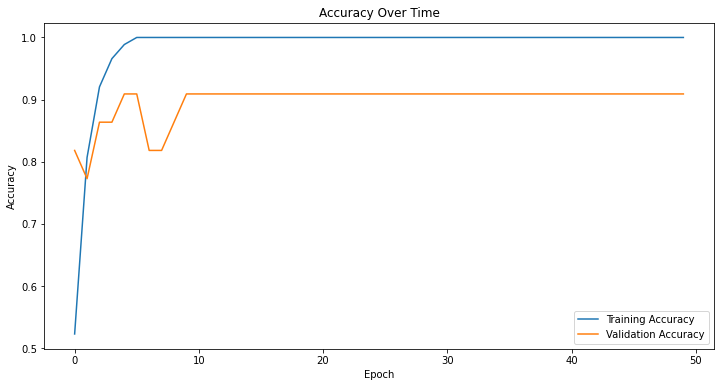

In [56]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [57]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8542 - auc: 0.9304


[0.439660906791687, 0.8541666865348816, 0.9304347634315491]

In [58]:
X_test.shape

(48, 59)

# Predicting individual's mental health

In [59]:
# new instances where we do not know the answer
#Xnew=[[1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0],[0,1,1,1,0,1,4,0,1,1,0,1,1.0,1,3.0,3.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0],[0,0,2,2,2,1,2,2,3,3,0,2,2.0,3,4.0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1],[1,0,0,0,2,2,5,1,1,1,0,1,3.0,1,1.0,5.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0],[0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1],[1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1]]
#Xnew = scaler.transform(Xnew)
# make a prediction
ynew = model.predict(X)
#print(ynew[0])
for i in range(data.shape[0]):
    print("X=%s, Predicted=%s" % (X[i], ynew[i]))

X=[-0.92906044 -0.60172167  0.22065873 -0.11853398  0.77100999  1.51578754
  0.48007914 -1.22904769  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.39151586 -0.56273143
  0.77198419 -0.43355498  0.77198419 -0.52363494  1.16542222 -0.59196905
 -0.68041382 -0.21530819 -0.16116459 -0.16116459 -0.07980869 -0.07980869
 -0.25993762 -0.13912167 -0.1132277  -0.16116459 -0.07980869 -0.21530819
 -0.07980869 -0.4940592   1.7175564  -0.07980869 -0.45398995 -0.16116459
 -0.1132277  -0.23094011 -0.55297841 -0.68041382  1.10695624 -0.21530819
  0.39151586 -0.31180478 -0.35856858  0.96271972 -0.76157731 -0.52363494
  1.06542721 -0.68041382 -0.71046598 -0.50395263  1.07906606], Predicted=[0.9975321]
X=[ 0.97732332 -0.60172167  0.22065873 -0.11853398 -1.82089593 -0.72247818
 -1.16888835  1.05553508  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.39151586  1.77704663
 -1.29536331 -0.43355498 -1.2953633

In [60]:
for i in range(6):
    if((ynew[i])>0.5):
        print('Depressed')
    else:
        print('Happy')

Depressed
Depressed
Happy
Depressed
Happy
Depressed


In [61]:
predicted=[]
for i in range(data.shape[0]):
    if ynew[i]>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [62]:
#test_labels=[1,0,1,0,1,0]
test_labels=y
cm = confusion_matrix(y_true=test_labels, y_pred=predicted)

In [63]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
cm_plot_labels = ['Depressed','Happy']

Confusion matrix, without normalization
[[70  7]
 [ 2 79]]


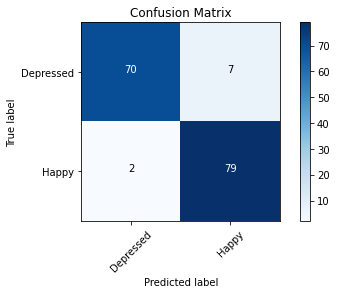

In [65]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')